# **DG Assessment**

<font color='white'>*Predicting tabular user data
Dependencies are as follow*</font> 


### <font color='Green'>Dependancies</font> 

In [1]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from keras import layers,Sequential
from keras.utils import to_categorical
from tensorflow import keras
import tensorflow as tf
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# <font color='green'>Reading the Data</font>

In [102]:
# load dataset
missing_val=['?']
dataframe_train = pandas.read_csv('/content/drive/My Drive/Colab Notebooks/Interview_Task/dk_data_train.csv',na_values=missing_val, header=None)
dataframe_test=pandas.read_csv('/content/drive/My Drive/Colab Notebooks/Interview_Task/dk_data_test_users.csv',na_values=missing_val, header=None)

print(np.shape(dataframe_test))
print(np.shape(dataframe_train))

dataframe_train.head()


(3447, 118)
(31018, 119)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118
0,1.000000,0.750000,0.857143,0.857143,0.806452,0.800000,s,n,1.0,1.0,1.0,1.0,1.0,1.0,s,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,NaN,NaN,NaN,m,0.99588,0.444444,0.1875,n,0.993168,0.4,0.222222,n,0.999675,0.461538,0.294118,n,0.999652,0.500000,0.352941,n,0.999936,1.000000,1
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.0,1.0,1.0,s,1.00000,1.000000,1.0000,s,1.000000,1.0,1.000000,s,1.000000,1.000000,1.000000,s,1.000000,1.000000,1.000000,s,1.000000,1.000000,1
2,1.000000,0.666667,0.800000,0.800000,0.619048,0.777778,s,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.00000,1.000000,1.0000,s,1.000000,1.0,1.000000,s,0.985810,0.333333,0.125000,n,0.984446,0.666667,0.333333,n,1.000000,0.999543,1
3,0.666667,0.666667,0.714286,0.666667,0.363636,0.517241,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.0,1.0,1.0,s,1.00000,1.000000,1.0000,s,1.000000,1.0,1.000000,s,0.999729,0.625000,0.500000,n,0.999544,0.666667,0.545455,n,1.000000,1.000000,1
4,0.666667,0.500000,0.761905,0.612245,0.631579,0.478261,n,n,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,NaN,NaN,NaN,NaN,NaN,NaN,m,m,...,s,1.0,1.0,1.0,1.0,1.0,1.0,s,s,NaN,NaN,NaN,m,NaN,NaN,NaN,m,1.0,1.0,1.0,s,1.00000,1.000000,1.0000,s,1.000000,1.0,1.000000,s,0.999984,0.777778,0.454545,n,0.999988,0.777778,0.538462,n,1.000000,1.000000,1


#<font color='yellow'>Pre Processing</font>


Trying to find column with less than 1% missing values
*   there is 34 columns without missing values
*   and 20 with less than 1% missing **values**

In [103]:

def drop_miss(df):
  missed=df.isna().sum()
  tobehold=[]
  for c in range(len(missed)):
    prc=missed[c]/len(df)*100
    if prc<1:
      tobehold.append(c)

  return tobehold




tobehold_train=drop_miss(dataframe_train)

tobehold_test=drop_miss(dataframe_test)

hpf=list(set(tobehold_train).intersection(tobehold_test))
print(len(hpf))

54


### <font color='yellow'>Dealing with missing values</font>
Check if <font color='Green'>Imputaion</font> of missing value will work for increasing prediction Accuracy?


*   I tried to Impute missing values using median of corresponding column values as a result the test accuracy droped by 22%
*   and without using Imputation (exploiting 34 features) gave 94% test accuracy





In [178]:

def dropNA(df):
  df=df.dropna(axis=1)
  print(np.shape(df))
  label_idx=np.shape(df)[1]-1
  df.columns=[i for i in range(np.shape(df)[1])]
  df[label_idx] = df[label_idx].replace(-1, 0)
  df.head()
  return df

def IMputNA(df,hpf):
  label_idx=np.shape(df)[1]-1
  df[label_idx] = df[label_idx].replace(-1, 0)
  #Used df.replace instead of LabelEncoder
  str_col=[i for i in range(np.shape(df)[1]) if df[i][0] in ['s','m','n'] ]
  df[str_col]=df[str_col].replace({'s':0,'m':1,'n':2})
  # df.filter Used instead of df.drop.isna
  df=df.filter(hpf)
  df.columns=[i for i in range(np.shape(df)[1])]
  df= SimpleImputer(strategy='median').fit_transform(df)
  return df




dataframe=dropNA(dataframe_train)
dataframe[:10]


(31018, 36)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,1.000000,0.750000,0.857143,0.857143,0.806452,0.800000,0,2,0,0,0,0,1,1,1,1,1,1,0,0,2,2,0,2,0,0,0,0,1,1,1,2,2,2,2,1
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,1.000000,0.666667,0.800000,0.800000,0.619048,0.777778,0,2,1,1,1,1,1,1,1,1,1,1,0,0,2,2,0,0,0,0,0,0,1,1,1,0,0,2,2,1
3,0.666667,0.666667,0.714286,0.666667,0.363636,0.517241,2,2,1,1,1,1,1,1,1,1,1,1,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,2,2,1
4,0.666667,0.500000,0.761905,0.612245,0.631579,0.478261,2,2,1,1,1,1,1,1,1,1,1,1,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,2,2,1
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,0,0,0,0,0,0,1,1,1,1,0,0,2,2,0,0,0,0,0,0,1,1,0,2,2,1,1,1
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,0,1,1,1,1,1,1,1,1,1,1,0,0,2,2,2,2,0,0,0,0,1,1,2,2,2,2,2,1
7,0.000000,0.000000,0.270833,0.000000,0.153846,0.000000,2,2,0,0,2,2,2,2,1,1,0,0,0,0,2,2,2,2,2,2,0,0,1,1,2,2,2,2,2,0
8,0.000000,0.000000,0.243304,0.033120,0.209302,0.042253,2,2,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,1,2,0,0,2,2,0
9,0.000000,0.000000,0.239583,0.000000,0.200000,0.000000,2,2,0,0,0,0,2,2,1,1,1,1,0,0,2,2,0,0,0,0,0,0,1,1,2,0,0,1,1,0


### <font color='yellow'>Categorical Labels Encoding</font>
Dealing with Categorical features
   

* Using sklearn LabelEncoder to encode categoricals
* skip this cell if you used IMpute(df) in previous cell


In [179]:
def LabelEncoding(df):
  str_col=[i for i in range(np.shape(df)[1]) if df[i][0] in ['s','m','n'] ]
  print(str_col)

  for i in str_col:
    col_encoder = preprocessing.LabelEncoder()
    col_encoder.fit(df[i])
    LabelEncoder()
    col_encoder.classes_

    df.loc[:,i]=col_encoder.transform(df[i])
  print(df[:5])
  return df


dataframe=LabelEncoding(dataframe)
print(np.shape(dataframe))
label_idx=np.shape(dataframe)[1]-1
print(label_idx)
X = dataframe.values[:,:label_idx]
Y_ = dataframe.values[:,label_idx]
print(Y_[:10])

[]
         0         1         2         3         4   ...  31  32  33  34  35
0  1.000000  0.750000  0.857143  0.857143  0.806452  ...   2   2   2   2   1
1  1.000000  1.000000  1.000000  1.000000  1.000000  ...   0   0   0   0   1
2  1.000000  0.666667  0.800000  0.800000  0.619048  ...   0   0   2   2   1
3  0.666667  0.666667  0.714286  0.666667  0.363636  ...   0   0   2   2   1
4  0.666667  0.500000  0.761905  0.612245  0.631579  ...   0   0   2   2   1

[5 rows x 36 columns]
(31018, 36)
35
[1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]


 
### <font color='green'>Feature Selection</font>


*   Deploy SelectKBest to see if an specific set of features are correlated enough to labels or not 
*   as the SelectKBest score shows, none of features are able to discreminate classes properly





In [172]:
def FeatureSelection(df,X,Y_):

  test = SelectKBest(score_func=chi2, k=10)
  fit = test.fit(X, Y_)

  print(fit.scores_)

  features = fit.transform(X)
  selected_indices=test.get_support(indices=True)

  print(selected_indices)
  return features,selected_indices

features,selected_indices=FeatureSelection(dataframe,X,Y_)

[3.97541004e+03 3.18423638e+03 1.70148011e+03 3.09476982e+03
 1.49336077e+03 3.11579761e+03 4.78598323e+03 2.28178340e+03
 1.88086855e+03 2.27444058e+03 1.59761556e+03 1.64445813e+03
 5.55167116e+01 1.21059957e+02 7.35285983e+02 6.74826336e+02
 1.70784604e+03 1.70784604e+03 6.64131500e+00 8.45240515e+00
 2.16237783e+02 2.21864239e+00 5.35054040e+02 5.27942446e+02
 2.88901793e+02 2.77140148e+02 7.01198418e-01 7.01198418e-01
 2.03664791e+03 1.06239798e+00 1.83445278e+03 1.52384993e+02
 1.51169108e+02 1.20451594e+00 4.57174554e+00]
[ 0  1  3  5  6  7  8  9 28 30]


# <font color='yellow'>Learning Models</font>

### <font color='yellow'>Decision Tree</font>



*   In this model top 6 informative feature selected by LDA have been used
*   whit top 10 feautres Model achived  <font color='green'>92.8%</font>   test Accuracy
* and whit top 6 accuracy is 87%
* using top 20 features accuracy is 93.1%



0.9285944551901999


[Text(185.65963887923672, 214.14545454545456, 'X[3] <= 0.218\ngini = 0.407\nsamples = 18610\nvalue = [5298, 13312]'),
 Text(91.89995546629045, 207.55636363636364, 'X[8] <= 1.5\ngini = 0.382\nsamples = 5424\nvalue = [4032, 1392]'),
 Text(69.24152791965302, 200.96727272727273, 'X[9] <= 1.5\ngini = 0.23\nsamples = 4611\nvalue = [4000, 611]'),
 Text(50.5389068675062, 194.37818181818182, 'X[4] <= 0.5\ngini = 0.093\nsamples = 3934\nvalue = [3742, 192]'),
 Text(43.12864098399089, 187.7890909090909, 'X[3] <= 0.185\ngini = 0.082\nsamples = 3908\nvalue = [3740, 168]'),
 Text(31.728097159890147, 181.2, 'X[8] <= 0.5\ngini = 0.069\nsamples = 3705\nvalue = [3572, 133]'),
 Text(23.08912351798513, 174.6109090909091, 'X[7] <= 1.5\ngini = 0.088\nsamples = 2517\nvalue = [2401, 116]'),
 Text(16.609367673655303, 168.0218181818182, 'X[6] <= 1.5\ngini = 0.129\nsamples = 1171\nvalue = [1090, 81]'),
 Text(12.22785853037712, 161.43272727272728, 'X[3] <= 0.129\ngini = 0.125\nsamples = 1162\nvalue = [1084, 78]'),

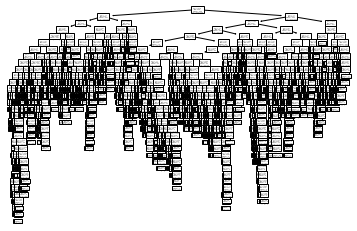

In [173]:
split=int(len(features)*0.6)
xx,yy=features[:split], Y_[:split]
ii,oo=features[split:], Y_[split:]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xx, yy)
sc=clf.score(ii, oo)
print(sc)
tree.plot_tree(clf)

###<font color='yellow'>CNN Model</font>
Using a simple CNN to extract informative feature map and then classify the samples


*   I've used 90% of labeld data for train and validation
*   the rest 10% labeled data are kept for test
*   this model achived 93% validation and test accuracy
* giving same selected feature to both Models, CNN in avverage achives about <font color='green'>1%</font> higher test Accuracy


In [174]:
X_=features

def prepairData(x,y):
  Y_=to_categorical(y,2)
  idx = np.random.permutation(len(x))
  Y= Y_[idx]
  X= x[idx]
  ns,nf=np.shape(X)
  train_split=int(len(X)*0.9)
  X_t=X[:train_split]
  Y_t=Y[:train_split]
  X_test=X[train_split:]
  Y_test=Y[train_split:]
  split=int(len(X_t)*0.6)
  X_train,y_train,X_val, y_val=X_t[:split],Y_t[:split],X_t[split:],Y_t[split:]
  print(nf)
  return X_train,y_train,X_val, y_val,X_test,Y_test,nf


def train(X_train,y_train,X_val, y_val,nf):
  model = tf.keras.Sequential()  

  model.add(tf.keras.layers.Input(shape=(nf)))
  model.add(tf.keras.layers.Reshape((nf,1)))
  model.add(tf.keras.layers.Conv1D(24,4,strides=1,activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv1D(16,1,activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv1D(4,1,activation='relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(2,activation='softmax'))


  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=100)

  scores = model.evaluate(X_test,Y_test , verbose=0)
  print("Test Accuracy: %.2f%%" % (scores[1]*100))
  return model


print(np.shape(X))
print(np.shape(Y_))
X_train,y_train,X_val, y_val,X_test,Y_test,nf=prepairData(X_,Y_)
model=train(X_train,y_train,X_val, y_val,nf)

(31018, 35)
(31018,)
10
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_20 (Reshape)         (None, 10, 1)             0         
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 7, 24)             120       
_________________________________________________________________
batch_normalization_68 (Batc (None, 7, 24)             96        
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 7, 16)             400       
_________________________________________________________________
batch_normalization_69 (Batc (None, 7, 16)             64        
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 7, 4)              68        
_________________________________________________________________
flatten_20 (Flatten)         

### <font color='yellow'>Result Curves</font>



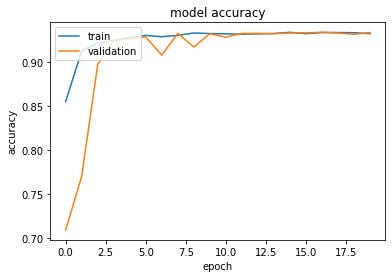

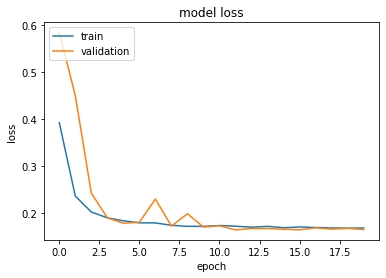

In [164]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# <font color='Green'>Classifying unlabeled Data
 </font>

Preprocessing of unlabeled data





In [180]:


dataframe_t=dropNA(dataframe_test)
dataframe_t=LabelEncoding(dataframe_t)
print(np.shape(dataframe_t))
"""
dataframe_test.columns=[i for i in range(np.shape(dataframe_test)[1])]

for i in range(6,35):
  col_encoder = preprocessing.LabelEncoder()
  col_encoder.fit(dataframe_test[i])
  LabelEncoder()
  col_encoder.classes_

  dataframe_test.loc[:,i]=col_encoder.transform(dataframe_test[i])

dataframe_test.head()"""



(3447, 36)
[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
         0         1         2         3         4   ...  31  32  33  34  35
0  0.500000  0.333333  0.466667  0.400000  0.157895  ...   1   1   1   1   1
1  0.333333  0.166667  0.512302  0.377778  0.394737  ...   1   1   1   1   1
2  0.000000  0.000000  0.373333  0.225000  0.392857  ...   1   1   1   1   0
3  1.000000  1.000000  1.000000  1.000000  1.000000  ...   2   2   0   0   1
4  0.333333  0.250000  0.409524  0.285714  0.125000  ...   2   2   1   1   1

[5 rows x 36 columns]
(3447, 36)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


'\ndataframe_test.columns=[i for i in range(np.shape(dataframe_test)[1])]\n\nfor i in range(6,35):\n  col_encoder = preprocessing.LabelEncoder()\n  col_encoder.fit(dataframe_test[i])\n  LabelEncoder()\n  col_encoder.classes_\n\n  dataframe_test.loc[:,i]=col_encoder.transform(dataframe_test[i])\n\ndataframe_test.head()'

### <font color='yellow'>Label Prediction</font>


*   the result is saved as "dk_data_test_users_withLabel.csv" in the same directory as test data 




In [181]:
ds=dataframe_t.values

label_idx=np.shape(ds)[1]
#Inp_test = np.asarray(ds[:,:label_idx])
Inp_test=ds[:,selected_indices]
print(np.shape(Inp_test))
pred=model.predict(Inp_test)

pred_l = [np.argmax(p) for p in pred]
print(pred_l)
dataframe_test[118] =pred_l
dataframe_test[118] = dataframe_test[118].replace(0, -1)
dataframe_test.to_csv('/content/drive/My Drive/Colab Notebooks/Interview_Task/dk_data_test_users_withLabel22.csv')

(3447, 10)
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1